## Static face detection

In [1]:
import numpy as np
import cv2
from PIL import Image
from IPython.display import display

In [ ]:
#load the xml files for face, eye and mouth detection into the program
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
def identify_face_plot(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(image, 1.4, 4)
    return faces.tolist()[0]



[86, 74, 129, 129]

# Cropping

In [62]:
def image_cropping(image_path):
    img = Image.open(image_path)

    coordinates = identify_face_plot(image_path)

    offset = 60
    left, top, right, bottom = coordinates
    left =  86 - offset
    top =  73 - offset
    right = left + 132 + (offset * 2)
    bottom = top + 132 + (offset * 2)

    im1 = img.crop((left, top, right, bottom))
    im1.show()



In [ ]:
# First Image
first = './images/face-detection/person.png'
narrow = './images/face-detection/narrow.png'
wide = './images/face-detection/wide.png'
obscure = './images/face-detection/obscure.png'


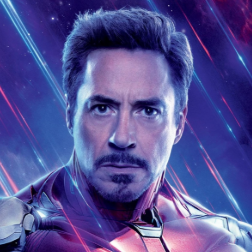

In [65]:
image_cropping(first)

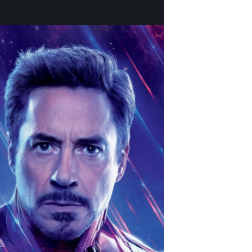

In [66]:
image_cropping(narrow)

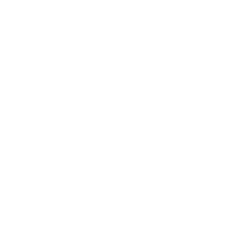

In [67]:
image_cropping(wide)

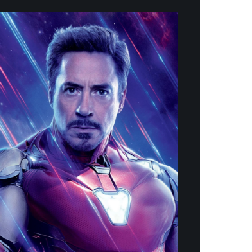

In [68]:
image_cropping(obscure)